In [12]:
pip install opencv-contrib-python==4.4.0.46

You should consider upgrading via the '//anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [16]:
import numpy as np
import cv2

# Filtering
kernel = np.ones((3, 3), np.uint8)

# Termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
criteria_stereo = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# Prepare object points
objp = np.zeros((8 * 6, 3), np.float32)
objp[:, :2] = np.mgrid[0:8, 0:6].T.reshape(-1, 2)

# Arrays to store object points and image points from all images
objpoints = []  # 3d points in real world space
imgpointsR = []  # 2d points in image plane
imgpointsL = []

# Start calibration from the camera
print('Starting calibration for the 2 cameras... ')
# Call all saved images
for i in range(0, 76):  # Put the amount of pictures you have taken for the calibration inbetween range(0,?) wenn starting from the image number 0
    #print(i)
    t = str(i)
    ChessImaR = cv2.imread('Right\chessboard-R' + t + '.png', 0)  # Right side
    ChessImaL = cv2.imread('Left\chessboard-L' + t + '.png', 0)  # Left side
    retR, cornersR = cv2.findChessboardCorners(ChessImaR, (8, 6),None)  # Define the number of chees corners we are looking for
    retL, cornersL = cv2.findChessboardCorners(ChessImaL, (8, 6), None)  # Left side
    if (True == retR) & (True == retL):
        objpoints.append(objp)
        cornersR = cv2.cornerSubPix(ChessImaR, cornersR, (11, 11), (-1, -1), criteria)
        cornersL = cv2.cornerSubPix(ChessImaL, cornersL, (11, 11), (-1, -1), criteria)
        imgpointsR.append(cornersR)
        imgpointsL.append(cornersL)

#   Right Side
retR, mtxR, distR, rvecsR, tvecsR = cv2.calibrateCamera(objpoints,
                                                        imgpointsR,
                                                        ChessImaR.shape[::-1], None, None)
hR, wR = ChessImaR.shape[:2]
OmtxR, roiR = cv2.getOptimalNewCameraMatrix(mtxR, distR,
                                            (wR, hR), 1, (wR, hR))

#   Left Side
retL, mtxL, distL, rvecsL, tvecsL = cv2.calibrateCamera(objpoints,
                                                        imgpointsL,
                                                        ChessImaL.shape[::-1], None, None)
hL, wL = ChessImaL.shape[:2]
OmtxL, roiL = cv2.getOptimalNewCameraMatrix(mtxL, distL, (wL, hL), 1, (wL, hL))


# StereoCalibrate function
flags = 0
flags |= cv2.CALIB_FIX_INTRINSIC
# flags |= cv2.CALIB_FIX_PRINCIPAL_POINT
# flags |= cv2.CALIB_USE_INTRINSIC_GUESS
# flags |= cv2.CALIB_FIX_FOCAL_LENGTH
# flags |= cv2.CALIB_FIX_ASPECT_RATIO
# flags |= cv2.CALIB_ZERO_TANGENT_DIST
# flags |= cv2.CALIB_RATIONAL_MODEL
# flags |= cv2.CALIB_SAME_FOCAL_LENGTH
# flags |= cv2.CALIB_FIX_K3
# flags |= cv2.CALIB_FIX_K4
# flags |= cv2.CALIB_FIX_K5
retS, MLS, dLS, MRS, dRS, R, T, E, F = cv2.stereoCalibrate(objpoints,
                                                           imgpointsL,
                                                           imgpointsR,
                                                           mtxL,
                                                           distL,
                                                           mtxR,
                                                           distR,
                                                           ChessImaR.shape[::-1],
                                                           criteria_stereo,
                                                           flags)

# StereoRectify function
rectify_scale = 0  # if 0 image croped, if 1 image nor croped
RL, RR, PL, PR, Q, roiL, roiR = cv2.stereoRectify(MLS, dLS, MRS, dRS,
                                                  ChessImaR.shape[::-1], R, T,
                                                  rectify_scale,
                                                  (0, 0))  # last paramater is alpha, if 0= croped, if 1= not croped
# initUndistortRectifyMap function
Left_Stereo_Map = cv2.initUndistortRectifyMap(MLS, dLS, RL, PL,
                                              ChessImaR.shape[::-1],
                                              cv2.CV_16SC2)  # cv2.CV_16SC2 this format enables us the programme to work faster
Right_Stereo_Map = cv2.initUndistortRectifyMap(MRS, dRS, RR, PR,
                                               ChessImaR.shape[::-1], cv2.CV_16SC2)


Left1=Left_Stereo_Map[1].reshape((480,640,1))
Left=np.concatenate((Left_Stereo_Map[0],Left1),axis=2)
LFTdata=Left.reshape(Left.shape[0],-1)
Right1=Right_Stereo_Map[1].reshape((480,640,1))
Right=np.concatenate((Right_Stereo_Map[0],Right1),axis=2)
RGTdata=Right.reshape(Right.shape[0],-1)

np.savetxt('Left_Stereo0.txt', LFTdata)
np.savetxt('Right_Stereo0.txt', RGTdata)

Starting calibration for the 2 cameras... 


error: OpenCV(4.4.0) /private/var/folders/nz/vv4_9tw56nv9k3tkvyszvwg80000gn/T/pip-req-build-tnokoph3/opencv/modules/imgproc/src/morph.dispatch.cpp:1022: error: (-215:Assertion failed) !src.empty() in function 'dilate'


In [ ]:
accumulated_verts = None
face_box = None
def append_ply_array(verts, colors):
    global accumulated_verts
    verts = verts.reshape(-1, 3)
    colors = colors.reshape(-1, 3)
    verts_new = np.hstack([verts, colors])
    if accumulated_verts is not None:
        accumulated_verts = np.vstack([accumulated_verts, verts_new])
        print(accumulated_verts)
    else:
        accumulated_verts = verts_new
        print(accumulated_verts)

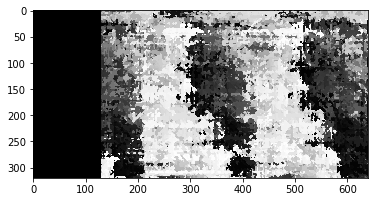

In [6]:
# Package importation
import numpy as np
import cv2
import os

kernel = np.ones((3, 3), np.uint8)

Lft=np.loadtxt("Left_Stereo0.txt",dtype=np.int16)
Rt=np.loadtxt("Right_Stereo0.txt",dtype=np.int16)

L=Lft.reshape(320,640,3)
L0=L[:,:,0:2]
L1=L[:,:,2]

R=Rt.reshape(320,640,3)
R0=R[:,:,0:2]
R1=R[:,:,2]
# Create StereoSGBM and prepare all parameters
window_size = 3
min_disp = 4
num_disp = 130 - min_disp
stereo = cv2.StereoSGBM_create(minDisparity=min_disp,
                               numDisparities=num_disp,
                               blockSize=window_size,
                               uniquenessRatio=10,
                               speckleWindowSize=100,
                               speckleRange=32,
                               disp12MaxDiff=5,
                               P1=8 * 3 * window_size ** 2,
                               P2=32 * 3 * window_size ** 2)

# Used for the filtered image
stereoR = cv2.ximgproc.createRightMatcher(stereo)  # Create another stereo for right this time

# WLS FILTER Parameters
lmbda = 80000
sigma = 1.8
visual_multiplier = 1.0

wls_filter = cv2.ximgproc.createDisparityWLSFilter(matcher_left=stereo)
wls_filter.setLambda(lmbda)
wls_filter.setSigmaColor(sigma)


# StereoVision
frameL=cv2.imread('Left/ImageL1.png')
frameR=cv2.imread('Right/ImageR1.png')

# Rectify the images on rotation and alignement
Left_nice = cv2.remap(frameL, L0, L1, cv2.INTER_LANCZOS4, cv2.BORDER_CONSTANT)  # Rectify the image using the kalibration parameters founds during the initialisation
Right_nice = cv2.remap(frameR,R0, R1, cv2.INTER_LANCZOS4, cv2.BORDER_CONSTANT)

grayR = cv2.cvtColor(Right_nice, cv2.COLOR_BGR2GRAY)
grayL = cv2.cvtColor(Left_nice, cv2.COLOR_BGR2GRAY)

# Compute the 2 images for the Depth_image
disp = stereo.compute(grayL, grayR)
plt.imshow(disp,"gray")


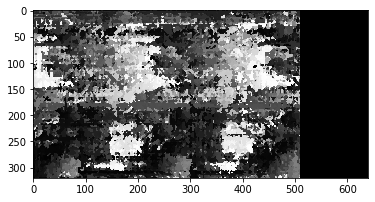

In [11]:
dispL = disp
dispR = stereoR.compute(grayR, grayL)
dispL = np.int16(dispL)
dispR = np.int16(dispR)
plt.imshow(dispR,"gray")


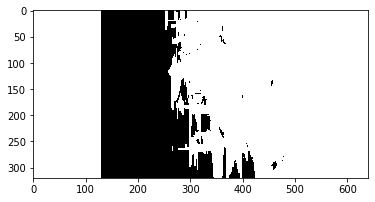

In [15]:
# Using the WLS filter
filteredImg = wls_filter.filter(dispL, grayL, grayR, dispR)
filteredImg = cv2.normalize(src=filteredImg, dst=filteredImg, beta=0, alpha=255, norm_type=cv2.NORM_MINMAX);
filteredImg = np.uint8(filteredImg)
plt.imshow(filteredImg,"gray")

In [ ]:
disp = ((disp.astype(
    np.float32) / 16) - min_disp) / num_disp  # Calculation allowing us to have 0 for the most distant object able to detect

# Filtering the Results with a closing filter
closing = cv2.morphologyEx(disp, cv2.MORPH_CLOSE,
                            kernel)  # Apply an morphological filter for closing little "black" holes in the picture(Remove noise)

# Colors map
dispc = (closing - closing.min()) * 255
print(dispc.shape)
dispC = dispc.astype(
    np.uint8)  # Convert the type of the matrix from float32 to uint8, this way you can show the results with the function cv2.imshow()
disp_Color = cv2.applyColorMap(dispC, cv2.COLORMAP_OCEAN)  # Change the Color of the Picture into an Ocean Color_Map
filt_Color = cv2.applyColorMap(filteredImg, cv2.COLORMAP_JET)

# Show the result for the Depth_image
cv2.imshow('Filtered Color Depth', filt_Color)

# End the Programme
if cv2.waitKey(0) & 0xFF == ord(' '):
        cv2.destroyAllWindows()


In [10]:

h, w = filt_Color.shape[:2]
print(h, w)
f = 0.8 * w  # guess for focal length
Q = np.float32([[1, 0, 0, -0.5 * w],
                [0, -1, 0, 0.5 * h],  # turn points 180 deg around x-axis,
                [0, 0, 0, -f],  # so that y-axis looks up
                [0, 0, 1, 0]])



Image3D = cv2.cv.CreateMat(dispL.shape[1], dispL.shape[0], cv2.CV_32FC3)
points = cv2.reprojectImageTo3D(disp,Image3D, Q) 
print(points.shape)

320 640


AttributeError: module 'cv2.cv2' has no attribute 'cv'

In [12]:
colors = cv2.cvtColor(Left_nice, cv2.COLOR_BGR2RGB)
mask = disp > disp.min()
out_points = points[mask]
out_colors = colors[mask]
append_ply_array(out_points, out_colors)

disparity_scaled = (dispC - min_disp) / num_disp
disparity_scaled += abs(np.amin(disparity_scaled))
disparity_scaled /= np.amax(disparity_scaled)
disparity_scaled[disparity_scaled < 0] = 0

image = np.array(255 * disparity_scaled, np.uint8) 
print(image.shape)
cv2.imshow('Filtered Color Depth', image[0])


NameError: name 'points' is not defined

In [7]:
from stl import mesh
m=mesh.Mesh(image>0)
m.save('filenam.stl')
print('sd')
cv2.imshow('Filtered Color Depth', accumulated_verts)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
# End the Programme
if cv2.waitKey(0) & 0xFF == ord(' '):
        cv2.destroyAllWindows()



